## **Challenge One: Data Analysis**  
**Question 2:  Which borough has the most incidents?**

In [ ]:
# Necessary imports for the operations

# !pip install psycopg2-binary
import re
import pandas as pd
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
# Function provided to access the Dataset from Redshift Database

def query_db(query):
 '''
    Runs sql query on 311 database and returns a pandas DataFrame.
    Redshift is a data warehouse based on PostgreSQL, so syntax is mostly the same
    '''
 host = 'interview-ds.ckgnwnm6pw4o.us-east-1.redshift.amazonaws.com'
 port = 5439
 db = 'interview'
 username = 'dsguest'
 password = 'nX9EFYUZ5Yu#0q'
 conn = psycopg2.connect(host=host, port=port, dbname=db, user=username, password=password)
 cur = conn.cursor()
 cur.execute(query)
 rows = cur.fetchall()
 rows = pd.DataFrame(rows)
 return rows

# **APPROACH 1: DIRECTLY QUERYING THE REQUIRED RESULT FROM DB**


# Querying from Database

In [ ]:
# query to retrieve unique borough column value counts in descending order  
query = '''SELECT borough, COUNT(*) as cnt
  FROM public.three_one_one
 GROUP BY borough
 ORDER BY cnt DESC'''

print(query_db(query))

               0        1
0       BROOKLYN  6342836
1         QUEENS  4865070
2      MANHATTAN  4134900
3          BRONX  3718699
4    Unspecified  1218678
5  STATEN ISLAND  1070930
6                       3


From above returned result we can conclude that **'BROOKLYN'** Borough had the most incidents reported.

Please note that there are more than 1.2 Million **'Unspecified'** entries in the Boroughs column. But consider the case if all these unspecified values belonged to any one of the other borough apart from Brookyln, the total count of the incidents in Brooklyn would still remain the highest.







---



---



# **APPROACH 2: QUERYING REQUIRED COLUMN FROM DB AND ANALYZING WITH PANDAS/PYTHON WITH VISUALIZATION**

# Querying from Database

In [ ]:
borough_column = query_db("SELECT borough FROM public.three_one_one;")
df_borough = borough_column

# Data Cleaning

In [ ]:
# Replacing empty value with NaN
df_borough.replace('', np.nan, inplace=True)

# Dropping NaN values from the table
df_borough.dropna(inplace=True)

# Data Processing

In [ ]:
# Retrieving occurence counts of each borough in non-ascending order
borough_value_counts = df_borough.value_counts(ascending = False)

# Converting Pandas Series to a Python dictionary 
borough_dict = borough_value_counts.to_dict()

# Regex to remove everything apart from alphabets and spaces from keys
alpha_regex = re.compile('[^a-zA-Z\s]')

# Filtering the dictionary and removing unnecessary characters
filtered_borough_dict = {}
for key, value in borough_dict.items():
  filtered_key = alpha_regex.sub('', str(key))
  filtered_key = filtered_key
  filtered_borough_dict[filtered_key] = value

# Data Visualization

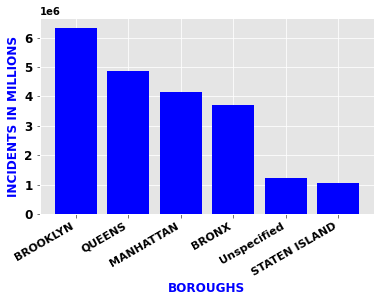

In [ ]:
borough_values = filtered_borough_dict.keys()
incident_counts = filtered_borough_dict.values()

# Plotting properties
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig, ax = plt.subplots()
fig.autofmt_xdate()


# Formatting the x-axis
plt.xlabel("BOROUGHS", fontsize=12, fontweight='bold')
ax.xaxis.label.set_color('blue')
ax.xaxis.set_tick_params(labelsize = 11, labelcolor = 'black')

# Formatting the y-axis
plt.ylabel("INCIDENTS IN MILLIONS", fontsize=12, fontweight='bold')
ax.yaxis.label.set_color('blue')
ax.yaxis.set_tick_params(labelsize = 12, labelcolor = 'black')

# Plotting the Bar Chart
ax.bar(borough_values, incident_counts, color = 'blue')

plt.show()

From above **Bar Chart**, we can visualize that the incidents reported in **'BROOKLYN'** were the highest.

Please note that there are more than 1.2 Million **'Unspecified'** entries in the Boroughs column. But consider the case if all these unspecified values belonged to any one of the other borough apart from Brookyln, the total count of the incidents in Brooklyn would still remain the highest.